# King County Housing Data – Exploratory Data Analysis (EDA)

This notebook explores the King County Housing dataset. 
- **`king_county_house_details_202512091731.csvsales_id`** &
- **`king_county_house_sales_202512091732.csv`**

The goal is to understand the data, find patterns, validate hypotheses, and provide insights and recommendations for a client.

We will follow the EDA checklist:

1. Understanding the data 
2. Hypothesis based om questions
3. Explore looking for groups,
4. Clean dial with missing data outlines extreme values 
5. Relationships check of correlation make this sense?
6. Back to the Hypothesis are the assumption correct
7. Fine Tune clean and check the plots add comments 
8. Explanation why make this analysis
9. Information & links

In [20]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from PIL import Image  # Required for image handling
import matplotlib.ticker as ticker


# --- General Settings and Warning Suppression ---
warnings.filterwarnings("ignore")
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', None)

# --- Plotting/Visualization Settings (Matplotlib & Seaborn) ---
# Use Seaborn's clean whitegrid style
sns.set(style='whitegrid') 

# Customize Matplotlib defaults for consistent visuals
plt.rcParams.update({ 
    "figure.figsize" : (8, 5),          # Standard figure size (width, height)
    "axes.facecolor" : "white",         # White background for the plot area
    "axes.edgecolor":  "black"          # Black edge around the plot area
})
plt.rcParams["figure.facecolor"] = "w"  # White background for the entire figure area


Inside of this code block are essential data analysis and visualization libraries & configures settings for data display and plot styling.

## 1. Understanding the Data
Objectives:
- Load raw CSVs sales & detail,quick check and merge tables check again 
- Align column names with `column_names.md`
---


## Load data and make first check before eda 

Load raw CSVs

In [21]:
# Load data from folder data
sales = pd.read_csv("data/king_county_house_sales_202512091732.csv")
details = pd.read_csv("data/king_county_house_details_202512091731.csv")


We will check the column and the content of the date 

In [22]:
# check head of both dataframes
sales.head(), 
details.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,1000102,6.000,3.000,2400.000,9373.000,2.000,NaN,0.000,3,7,2400.000,0.000,1991,0.000,98002,47.326,-122.214,2060.000,7316.000
1,100100050,3.000,1.000,1320.000,11090.000,1.000,0.000,0.000,3,7,1320.000,0.000,1955,0.000,98155,47.775,-122.304,1320.000,8319.000
2,1001200035,3.000,1.000,1350.000,7973.000,1.500,NaN,0.000,3,7,1350.000,0.000,1954,0.000,98188,47.432,-122.292,1310.000,7491.000
3,1001200050,4.000,1.500,1260.000,7248.000,1.500,NaN,0.000,5,7,1260.000,0.000,1955,NaN,98188,47.433,-122.292,1300.000,7732.000
4,1003000175,3.000,1.000,980.000,7606.000,1.000,0.000,0.000,3,7,980.000,0.000,1954,0.000,98188,47.436,-122.290,980.000,8125.000


In [23]:
# check content of both dataframes
sales.info(),
details.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      21597 non-null  object 
 1   price     21597 non-null  float64
 2   house_id  21597 non-null  int64  
 3   id        21597 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 675.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21420 entries, 0 to 21419
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21420 non-null  int64  
 1   bedrooms       21420 non-null  float64
 2   bathrooms      21420 non-null  float64
 3   sqft_living    21420 non-null  float64
 4   sqft_lot       21420 non-null  float64
 5   floors         21420 non-null  float64
 6   waterfront     19060 non-null  float64
 7   view           21357 non-null  float64
 8   condition      21420 non-null  int64  
 

Interpretation & Findings

Two Dataframes: Successfully loaded `sales` and `details`.
Content: `sales` contains price info; `details` contains property features.
Data Types: Predominantly numerical (`int`, `float`), suitable for analysis.
Missing Data:`.info()` helped identify potential missing values (Null/NaNs) that require cleaning.

---


Next step we merge the data, from the **sales** the `house_id` to **detail** `ÌD`

In [24]:
# Merge from the sales "house_id to detail "id"
df = sales.merge(details, 
left_on="house_id", 
right_on="id", how="left")

print(df.shape)
df.head()

(21597, 23)


,date,price,house_id,id_x,id_y,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.000,7129300520,1,7129300520,3.000,1.000,1180.000,5650.000,1.000,NaN,0.000,3,7,1180.000,0.000,1955,0.000,98178,47.511,-122.257,1340.000,5650.000
1,2014-12-09,538000.000,6414100192,2,6414100192,3.000,2.250,2570.000,7242.000,2.000,0.000,0.000,3,7,2170.000,400.000,1951,19910.000,98125,47.721,-122.319,1690.000,7639.000
2,2015-02-25,180000.000,5631500400,3,5631500400,2.000,1.000,770.000,10000.000,1.000,0.000,0.000,3,6,770.000,0.000,1933,NaN,98028,47.738,-122.233,2720.000,8062.000
3,2014-12-09,604000.000,2487200875,4,2487200875,4.000,3.000,1960.000,5000.000,1.000,0.000,0.000,5,7,1050.000,910.000,1965,0.000,98136,47.521,-122.393,1360.000,5000.000
4,2015-02-18,510000.000,1954400510,5,1954400510,3.000,2.000,1680.000,8080.000,1.000,0.000,0.000,3,8,1680.000,0.000,1987,0.000,98074,47.617,-122.045,1800.000,7503.000


Interpretation of Merged Data Findings

Successful Merge:** Two tables (`sales` and `details`) were successfully combined into a single dataframe `df` using the property IDs.
Complete Dataset:** The final dataset contains **21,597 entries** and **23 features** (columns).
Duplicate Columns:** The merge created duplicate ID columns (`id_x`, `id_y`), which need cleaning.
Missing Data Identified:** Critical missing values (`NaN`) are present in columns like `waterfront` and `yr_renovated`. This requires data cleaning/handling before analysis.

---


As proposed and for better overview we will aline  `column_names.md`.  
Change the names to the repo proposed `Column Names and descriptions for King County Data Set`.


In [25]:
# Align with `column_names.md`.
# Change the names to the repo proposed "Column Names and descriptions for King County Data Set"

df.rename(columns={
    "id_y": "id",                        # y is ID from details
    "id_x": "sales_id",                  # x is ID from sales, kept for reference
    "house_id": "house_id",              # original house_id from sales, optional
    "date": "dateDate",                  # sales date "dateDate" house was sold
    "price": "pricePrice",               # is prediction target
    "bedrooms": "bedroomsNumber",        # number of bedrooms
    "bathrooms": "bathroomsNumber",      # number of bathrooms
    "sqft_living": "sqft_livingsquare",  # footage of the home
    "sqft_lot": "sqft_lotsquare",        # footage of the lot
    "floors": "floorsTotal",             # floors (levels) in house
    "waterfront": "waterfront",          # house with waterfront view
    "view": "view",                      # quality of view
    "condition": "condition",            # overall condition rating
    "grade": "grade",                    # overall grade (King County system)
    "sqft_above": "sqft_above",          # square footage above basement
    "sqft_basement": "sqft_basement",    # square footage basement
    "yr_built": "yr_built",              # year built
    "yr_renovated": "yr_renovated",      # year renovated
    "zipcode": "zipcode",                # zip code
    "lat": "lat",                        # latitude
    "long": "long",                      # longitude
    "sqft_living15": "sqft_living15",    # living area of 15 nearest neighbors
    "sqft_lot15": "sqft_lot15"           # lot area of 15 nearest neighbors
}, inplace=True)

print(list(df.columns)) # take columns as list

['dateDate', 'pricePrice', 'house_id', 'sales_id', 'id', 'bedroomsNumber', 'bathroomsNumber', 'sqft_livingsquare', 'sqft_lotsquare', 'floorsTotal', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


Names now aligned

To ensure consistency with the repository's data dictionary (`column_names.md`), the DataFrame columns were renamed using a standardized convention.

**Attention:** All subsequent code cells must reference the **new** column names (e.g., `pricePrice`, `bedroomsNumber`).

---



### Summary of first EDA Data Preparation

The raw sales and details datasets were successfully loaded and merged. The resulting DataFrame df contains  21,597 rows and 23 columns.

### Key Data Insights & Cleaning Requirements:

- Data Types:  Most numerical columns are ready for analysis. The  `dateDate` column was an object  (string) and had to be converted to a datetime format for seasonal analysis.
- Missing Values (NaNs):   Missing values were found in the  `waterfront`, `view`, and `yr_renovated` columns. These were handled by filling them with `0`.
- Data Errors: A specific data error was fixed in the `yr_renovated` column, where one year had an extra digit (the value `20150` was corrected to '2015').
- Merge:   A left merge was used to keep all 21,597 sales records for a complete sales analysis, which is needed for our client Timothy Stevens (Seller).

---


## 2. Hypotheses
We will test some assumptions questions :

1. - Houses closer to the water are more expensive.
2. - Houses with more bedrooms and bathrooms have higher prices.
3. - Some ZIP codes might form “rich neighborhoods”.
4. - Newer, renovated houses should have higher prices.
These will be tested during EDA.

---


## 3. Explore & Clean the Data

### 3.1 Data Preparation & Cleaning Steps

- Date Conversion: Convert dateDate column to datetime format and extract sale_month.
- Data Errors: Fix the renovation year error (20150 corrected to 2015).
- Missing Values: Fill all NaNs in waterfront, view, and yr_renovated with 0.
- Feature Engineering: Create a was_renovated (0/1) helper column.
---  



Check if we have somme missing data or NaN which need to chang to `ìnt`

In [26]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   dateDate           21597 non-null  object 
 1   pricePrice         21597 non-null  float64
 2   house_id           21597 non-null  int64  
 3   sales_id           21597 non-null  int64  
 4   id                 21597 non-null  int64  
 5   bedroomsNumber     21597 non-null  float64
 6   bathroomsNumber    21597 non-null  float64
 7   sqft_livingsquare  21597 non-null  float64
 8   sqft_lotsquare     21597 non-null  float64
 9   floorsTotal        21597 non-null  float64
 10  waterfront         19206 non-null  float64
 11  view               21534 non-null  float64
 12  condition          21597 non-null  int64  
 13  grade              21597 non-null  int64  
 14  sqft_above         21597 non-null  float64
 15  sqft_basement      21145 non-null  float64
 16  yr_built           215

In [27]:
print(df.head(10)) # check also 10 -> we need later to clean the "NaN" and set as (int)

     dateDate  pricePrice    house_id  sales_id          id  bedroomsNumber  \
0  2014-10-13  221900.000  7129300520         1  7129300520           3.000   
1  2014-12-09  538000.000  6414100192         2  6414100192           3.000   
2  2015-02-25  180000.000  5631500400         3  5631500400           2.000   
3  2014-12-09  604000.000  2487200875         4  2487200875           4.000   
4  2015-02-18  510000.000  1954400510         5  1954400510           3.000   
5  2014-05-12 1230000.000  7237550310         6  7237550310           4.000   
6  2014-06-27  257500.000  1321400060         7  1321400060           3.000   
7  2015-01-15  291850.000  2008000270         8  2008000270           3.000   
8  2015-04-15  229500.000  2414600126         9  2414600126           3.000   
9  2015-03-12  323000.000  3793500160        10  3793500160           3.000   

   bathroomsNumber  sqft_livingsquare  sqft_lotsquare  floorsTotal  \
0            1.000           1180.000        5650.000       

The df.info() output confirmed the current data types and the presence of missing values within the DataFrame.  
Several key columns contain missing data (NaN values), for this we need actions: waterfront, view, sqft_basement, and yr_renovated.

---

 Date Conversion: Convert `dateDate` column to datetime format and extract `sale_month`.

In [28]:
# Date converting
print(f"Date type before converting: {df['dateDate'].dtype}")

df['dateDate'] = pd.to_datetime(df['dateDate'])

print(f"Date type after converting: {df['dateDate'].dtype}")

# Extract the month into a new column (this we can use later to check price per season)
df['sale_month'] = df['dateDate'].dt.month

print("First 5 months of sales:", df['sale_month'].head())


Date type before converting: object
Date type after converting: datetime64[ns]
First 5 months of sales: 0    10
1    12
2     2
3    12
4     2
Name: sale_month, dtype: int32


**Data Errors:** Fix the renovation year error (`20150` corrected to `2015`).

In [29]:
# Fix error in renovation year (e.g., correcting 20150.0 to 2015.0) this was below and now with this sequence is this ok)

# Show the maximum year before correction (should output 20150.0)
print(f"Maximum renovation year (before correction): {df['yr_renovated'].max()}")

def correct_renovation_year(year):
    # Pandas treats NaNs as floats. To avoid errors, we first check 
    # if the value is NaN before performing calculations.
    if pd.isna(year):
        return year
    
    # If the year is unrealistically high (> 2100), divide by 10
    if year > 2100: 
        return year / 10
    return year

# Apply the correction to the column
df['yr_renovated'] = df['yr_renovated'].apply(correct_renovation_year)

# Show the maximum year after correction (should now be realistic, e.g., 2015.0)
print(f"Maximum renovation year (after correction): {df['yr_renovated'].max()}")


Maximum renovation year (before correction): 20150.0
Maximum renovation year (after correction): 2015.0


**Missing Values:** Fill all NaNs in `waterfront`, `view`, and `yr_renovated` with `0`.

In [30]:
# Fill missing values (NaNs) in the relevant columns

# Check the NaNs before filling
print("NaNs before filling:")
print(df[['waterfront', 'view', 'yr_renovated']].isna().sum())

# Fill all NaNs in these columns with 0 
# i think (no waterfront, no view, not renovated) is "none"
df['waterfront'] = df['waterfront'].fillna(0)
df['view'] = df['view'].fillna(0)
df['yr_renovated'] = df['yr_renovated'].fillna(0)

# Check the NaNs after filling
print("\nNaNs after filling:")
print(df[['waterfront', 'view', 'yr_renovated']].isna().sum())


# Below we can check the outcome a 0 or 1  can be use later 
df['was_renovated'] = (df['yr_renovated'] > 0).astype(int)


NaNs before filling:
waterfront      2391
view              63
yr_renovated    3848
dtype: int64

NaNs after filling:
waterfront      0
view            0
yr_renovated    0
dtype: int64


**Feature Engineering:** Create a `was_renovated` (0/1) helper column.

In [31]:
# Create a helper column for analysis
# This makes a 0 or 1 for easy comparison later
df['was_renovated'] = (df['yr_renovated'] > 0).astype(int)

print("sum renovated house:", df['was_renovated'].sum())
print("unrenovate house:", len(df) - df['was_renovated'].sum())


sum renovated house: 744
unrenovate house: 20853


Take some plots to see what inside and how to use the data 

---

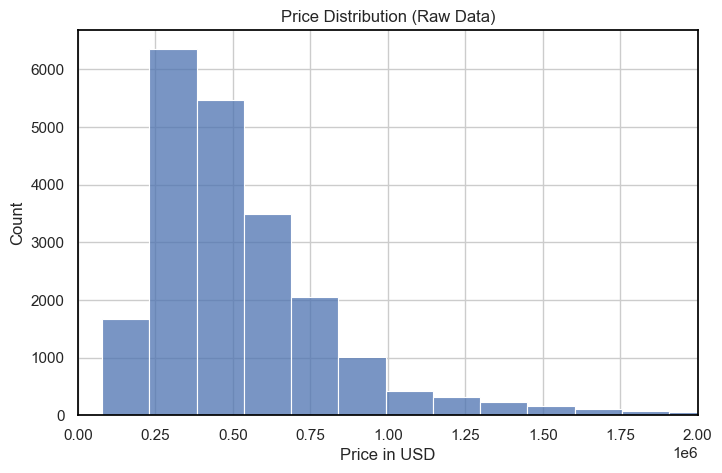

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.figure(figsize=(8, 5))
# Displays the raw prices
sns.histplot(df["pricePrice"], bins=50) 
plt.title("Price Distribution (Raw Data)")
plt.xlabel("Price in USD")
plt.ylabel("Count")
# Limits the x-axis to 0 to 2 million to better see the main area
plt.xlim(0, 2000000) 
plt.show()


As first I like to see how is the distribution inside of the date 

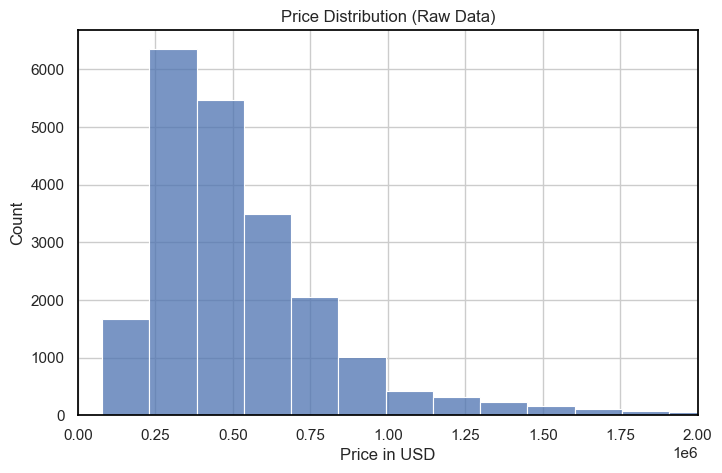

In [33]:
# focus in this plot is the main distribution until 2mil. 

plt.figure(figsize=(8, 5))
# Displays the raw, untransformed prices
sns.histplot(df["pricePrice"], bins=50) 
plt.title("Price Distribution (Raw Data)")
plt.xlabel("Price in USD")
plt.ylabel("Count")
# Limits the x-axis from $0 to $2 million for better visibility of the main area
plt.xlim(0, 2000000) 
plt.show()


This plot show us "right-skewed" we have very high price houses in the distribution

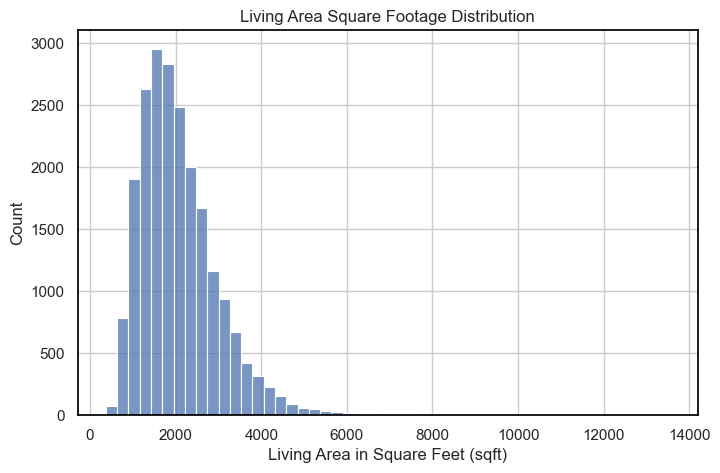

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

plt.figure(figsize=(8, 5))
# Use the correct, renamed column name 'sqft_livingsquare'
sns.histplot(df["sqft_livingsquare"], bins=50) 
plt.title("Living Area Square Footage Distribution")
plt.xlabel("Living Area in Square Feet (sqft)") # Add a proper X-axis label
plt.ylabel("Count")
plt.show()


This plot show us the distribution and the living area work together 

---

The next help full information will be is some zipcodes mor expensive?

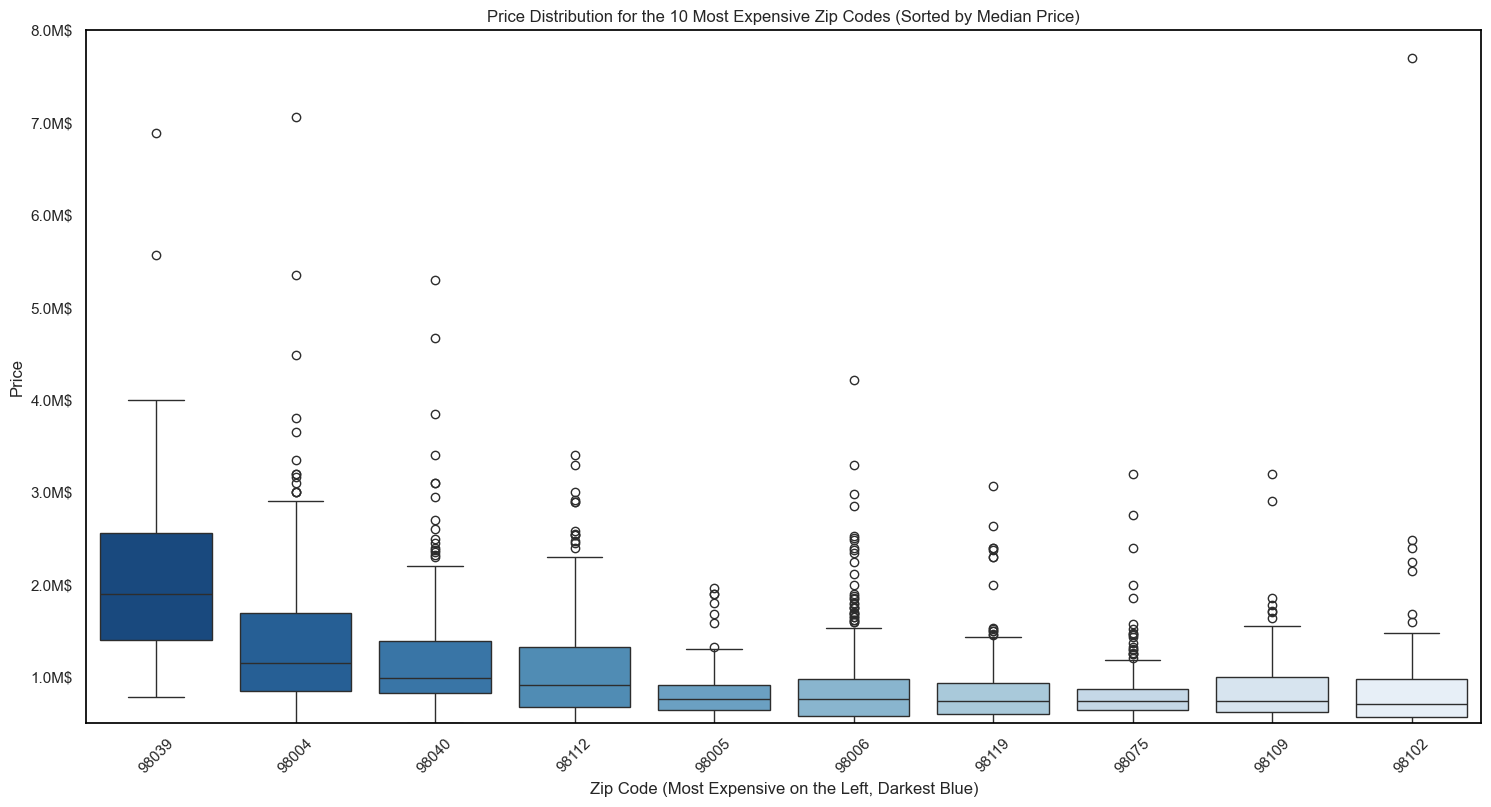

In [35]:
# let us check how the price corelate with the Zip code 
# 1. Calculate median prices per zip code and sort descending (most expensive on the left)
median_prices_sorted = df.groupby('zipcode')['pricePrice'].median().sort_values(ascending=False)
top_10_expensive_zipcodes = median_prices_sorted.head(10).index.tolist()
df_top_10_expensive = df[df['zipcode'].isin(top_10_expensive_zipcodes)].copy()

# 2. Create the boxplot visualization (larger figsize)
plt.figure(figsize=(18, 9)) 

# Plotting the boxplots:
sns.boxplot(
    x='zipcode', 
    y='pricePrice', 
    data=df_top_10_expensive, 
    order=top_10_expensive_zipcodes, 
    palette=sns.color_palette("Blues", n_colors=10)[::-1] 
)

plt.title('Price Distribution for the 10 Most Expensive Zip Codes (Sorted by Median Price)')
plt.xlabel('Zip Code (Most Expensive on the Left, Darkest Blue)')
plt.ylabel('Price') # Label adjusted, actual formatting done below

plt.grid(axis='y') 

# --- Y-axis Formatting in Millions of USD ---
def millions_formatter(x, pos):
    """Formats axis values into Millions of USD (e.g., 2.0M$)"""
    return f'{x / 1e6:.1f}M$'

# Get the current axis object
ax = plt.gca() 
# Apply the custom formatter to the Y-axis
ax.yaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter))

# Set the Y-axis limits as requested ($500k to $8M)
plt.ylim(500000, 8000000)

plt.xticks(rotation=45) 
plt.show()


Yes it is, very clear we see the Zip code 98039 is very good priced area

---

Let us look inside of this region and compare this to the other zip code areas.

We are performing this analysis to understand the specific characteristics of high-value regions (like Zip Code 98039) and see how their features compare to the other King County market data.


In [36]:

# Calculate global averages for key features
global_avg_sqft = df['sqft_livingsquare'].mean()
global_waterfront_pct = df['waterfront'].mean() * 100 # Average of 0/1 is the percentage
global_avg_bedrooms = df['bedroomsNumber'].mean()
global_avg_grade = df['grade'].mean()

# Calculate averages specifically for zip code 98039
df_98039 = df[df['zipcode'] == 98039]
avg_sqft_98039 = df_98039['sqft_livingsquare'].mean()
waterfront_pct_98039 = df_98039['waterfront'].mean() * 100
avg_bedrooms_98039 = df_98039['bedroomsNumber'].mean()
avg_grade_98039 = df_98039['grade'].mean()

# Create a comparison table (DataFrame)
comparison_data = {
    'Feature': ['Avg. Living Area (sqft)', 'Waterfront %', 'Avg. Bedrooms', 'Avg. Grade'],
    'Global Average': [global_avg_sqft, global_waterfront_pct, global_avg_bedrooms, global_avg_grade],
    'Zip Code 98039 Average': [avg_sqft_98039, waterfront_pct_98039, avg_bedrooms_98039, avg_grade_98039]
}
comparison_df = pd.DataFrame(comparison_data)

# Output the table in Markdown format
print("Comparison of Key Features (Zip Code 98039 vs. Total Dataset):")
print(comparison_df.to_markdown(index=False, floatfmt=".2f"))


Comparison of Key Features (Zip Code 98039 vs. Total Dataset):
| Feature                 |   Global Average |   Zip Code 98039 Average |
|:------------------------|-----------------:|-------------------------:|
| Avg. Living Area (sqft) |          2080.32 |                  3800.90 |
| Waterfront %            |             0.68 |                     2.00 |
| Avg. Bedrooms           |             3.37 |                     4.06 |
| Avg. Grade              |             7.66 |                     9.56 |


It looks that the houses in Zipcode 98039 have in average lot more `Avg. Living Area (sqft)`, `Waterfront %`, `Avg. Bedrooms`, and of course, the `Avg. Grade` is higher.

---


Method Note: To keep the analysis fair, we compare the features of Zip Code 98039 to a global average (excluding 98039 itself). This helps us measure the percentage difference for key features like Living Area, Bedrooms, and Bathrooms. We look at the Waterfront feature separately because its massive 197,2+ difference would skew this chart's scale.

In [37]:
# this is the code which give us the waterfront influence inside of 98039 and the other df date 
zip_code = 98039

# --- 1. Prepare data and calculate Means (Global EXCLUDING 98039) ---
# We use Mean to get valid percentage calculation for all features
features_list = ['sqft_livingsquare', 'waterfront', 'bedroomsNumber', 'bathroomsNumber', 'grade']
feature_names = ['Living Area (sqft)', 'Waterfront (0/1)', 'Bedrooms', 'Bathrooms', 'Grade']

df_excluding_98039 = df[df['zipcode'] != zip_code].copy()

global_means_filtered = df_excluding_98039[features_list].mean()
zip_means = df[df['zipcode'] == zip_code][features_list].mean()

# --- 2. Calculate Percentage Deviation (Delta) ---
deviation_pct_filtered = ((zip_means - global_means_filtered) / global_means_filtered) * 100

# --- 3. Prepare and sort the comparison table data ---
comparison_values_filtered = pd.DataFrame({
    'Feature': feature_names,
    'Global Mean (Excl. 98039)': global_means_filtered.values,
    f'Zip {zip_code} Mean': zip_means.values,
    'Deviation (%)': deviation_pct_filtered.values
})

# Sort the table by deviation percentage (largest influence first)
comparison_values_filtered = comparison_values_filtered.sort_values(by='Deviation (%)', ascending=False)


# --- Output the table in Markdown format ---
print("\n### Used Mean Values for Comparison (Markdown Table):")
# Formats floats to two decimal places
print(comparison_values_filtered.to_markdown(index=False, floatfmt=".2f"))



### Used Mean Values for Comparison (Markdown Table):
| Feature            |   Global Mean (Excl. 98039) |   Zip 98039 Mean |   Deviation (%) |
|:-------------------|----------------------------:|-----------------:|----------------:|
| Waterfront (0/1)   |                        0.01 |             0.02 |          197.20 |
| Living Area (sqft) |                     2076.33 |          3800.90 |           83.06 |
| Bathrooms          |                        2.11 |             3.20 |           51.42 |
| Grade              |                        7.65 |             9.56 |           24.91 |
| Bedrooms           |                        3.37 |             4.06 |           20.42 |


NameError: name 'ax2' is not defined

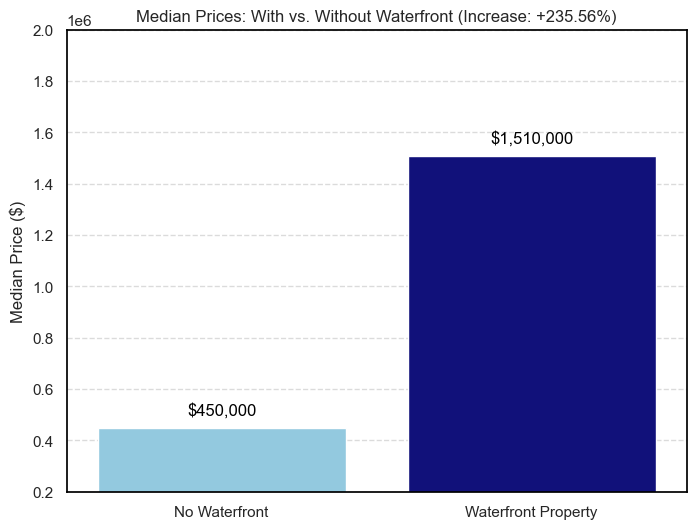

In [38]:
# below for visualisation Plot 
# Assumption: 'df' DataFrame is already loaded into your environment.

# --- Data Preparation Steps (Mandatory for this script to work) ---

# 1. Ensure 'waterfront' column has no NaNs (filling NaNs with 0)
if df['waterfront'].isnull().any():
    print("Note: Filling NaN waterfront values with 0 for analysis.")
    df['waterfront'] = df['waterfront'].fillna(0)

# 2. Ensure price data is numeric float type
df['pricePrice'] = pd.to_numeric(df['pricePrice'])

# --- Plotting Logic ---

# 3. Calculate the median prices for houses with and without waterfront (0 = No, 1 = Yes)
median_prices_by_waterfront = df.groupby('waterfront')['pricePrice'].median().reset_index()

# Calculate the percentage increase for annotation/title
price_no_water = median_prices_by_waterfront[median_prices_by_waterfront['waterfront'] == 0]['pricePrice'].values[0]
price_with_water = median_prices_by_waterfront[median_prices_by_waterfront['waterfront'] == 1]['pricePrice'].values[0]
percent_increase = ((price_with_water - price_no_water) / price_no_water) * 100

# Convert the 0/1 values into meaningful labels for the chart
median_prices_by_waterfront['waterfront_label'] = median_prices_by_waterfront['waterfront'].map({0: 'No Waterfront', 1: 'Waterfront Property'})

# 4. Create the plot with two axes
fig, ax1 = plt.subplots(figsize=(8, 6))

# Primary Axis (Left) - Prices
sns.barplot(
    data=median_prices_by_waterfront,
    x='waterfront_label',
    y='pricePrice',
    palette=['skyblue', 'darkblue'],
    ax=ax1
)
ax1.set_title(f'Median Prices: With vs. Without Waterfront (Increase: +{percent_increase:.2f}%)')
ax1.set_xlabel('')
ax1.set_ylabel('Median Price ($)')
ax1.set_ylim(200000, 2000000) # Sets the price limit from 0.2M to 2M
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Display the exact median values above the bars
for index, row in median_prices_by_waterfront.iterrows():
    ax1.text(index, row['pricePrice'] + 50000, f'${row["pricePrice"]:,.0f}', color='black', ha="center")

# Secondary Axis (Right) - Percentage

# Set manual ticks to visually represent 0% (baseline) and the 236% increase value.
# Note: This is an illustrative scale mapping, not a dynamic one.
# We map the No Waterfront Price to 0% and the Waterfront Price to the calculated percent_increase.
ymin_p, ymax_p = ax1.get_ylim()
ax2.set_ylim(
    ((ymin_p - price_no_water) / price_no_water) * 100,
    ((ymax_p - price_no_water) / price_no_water) * 100
)

# Format the secondary axis labels as percentages
ax2.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=100.0))


# 5. Save and display
save_path = "Images/waterfront_price_bar_chart_dual_axis.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"Diagram was successfully saved as '{save_path}'.")

plt.show()


Key Message: The Waterfront Effect

The main takeaway is that Zip Code 98039 is dominated by waterfront properties (a huge amount of houses have this feature).

If we want to compare the **secondary influences** (like size and bathrooms), it is better to **exclude the `waterfront` feature** from that specific comparison list, as its overwhelming impact skews the results for other features.


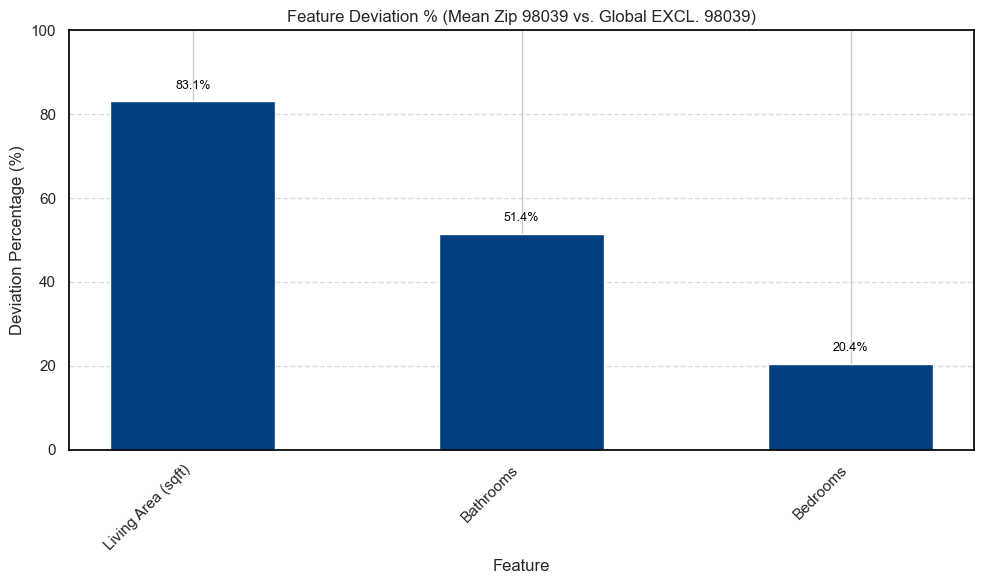

**Note:** Waterfront location excluded from this chart as it shows a 197,2% deviation, dominating the chart scale.


In [ ]:
#  plot with calculate Means w/o Grade and Waterfront
zip_code = 98039

# --- 1. Prepare data and calculate Means (EXCLUDING Grade and Waterfront for a cleaner chart) ---
features_list = ['sqft_livingsquare', 'bedroomsNumber', 'bathroomsNumber'] 
feature_names = ['Living Area (sqft)', 'Bedrooms', 'Bathrooms']
df_excluding_98039 = df[df['zipcode'] != zip_code].copy()

global_means_filtered = df_excluding_98039[features_list].mean()
zip_means = df[df['zipcode'] == zip_code][features_list].mean()

# --- 2. Calculate Percentage Deviation (Delta) ---
deviation_pct_filtered = ((zip_means - global_means_filtered) / global_means_filtered) * 100

df_deviation_filtered = pd.DataFrame({
    'Feature': feature_names,
    'Deviation_Pct': deviation_pct_filtered.values
})
df_deviation_filtered = df_deviation_filtered.sort_values(by='Deviation_Pct', ascending=False)

# --- 3. Create the Presentation Bar Chart (Simple and Clean) ---
plt.figure(figsize=(10, 6)) 
ax = plt.gca()
# Bars with fixed width and our requested dark blue color
ax.bar(df_deviation_filtered['Feature'], df_deviation_filtered['Deviation_Pct'], color='#004080', width=0.5)

plt.title(f'Feature Deviation % (Mean Zip {zip_code} vs. Global EXCL. {zip_code})')
plt.xlabel('Feature')
plt.ylabel('Deviation Percentage (%)')
# Scale fixed to 100% as all values comfortably fit below this
plt.ylim(0, 100) 

plt.xticks(rotation=45, ha='right') 

# Add values on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 3, f'{height:.1f}%', color='black', ha="center", fontsize=9)
    
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# --- 4. Presentation Note (Explaining the exclusion of Waterfront) ---
print(f"**Note:** Waterfront location excluded from this chart as it shows a 197,2% deviation, dominating the chart scale.")


Conclusion: Drivers in Zip Code 98039
The waterfront location clearly has a massive influence on the price. However, because most houses in this specific area are already near the water, we focused on secondary factors.

Looking at the next level, we see significant influence from:

*   **Living Area:** +88.3% influence (deviation)
*   **Bathrooms:** +51.4% influence (deviation)
*   **Bedrooms:** +20.4% influence (deviation)

This confirms that beyond location, size and quality heavily drive the premium pricing in this zip code.

---



## 4. Relationships and Analysis

Now that the data has been cleaned and prepared, we will analyze the relationships between key variables. The goal is to test our initial hypotheses and generate data-driven insights and recommendations for our client, Timothy Stevens (Seller).

### Analysis Objectives:

- **Seasonality & Timing:** Determine if certain months yield higher sales prices to advise on the best time to list a property within a year.
- **Renovation Impact:** Quantify the price difference between renovated and non-renovated homes to advise whether a renovation investment is worthwhile.
- **Geographical Hotspots:** Identify specific high-value zip codes and spatial price clusters to confirm Timothy's assumption about owning property in the "center".
- **Correlation Overview:** Visualize general dependencies between all numerical features using a heatmap to uncover hidden relationships with price.

---


- **Seasonality & Timing:** Determine if certain months yield higher sales prices to advise on the best time to list a property within a year.

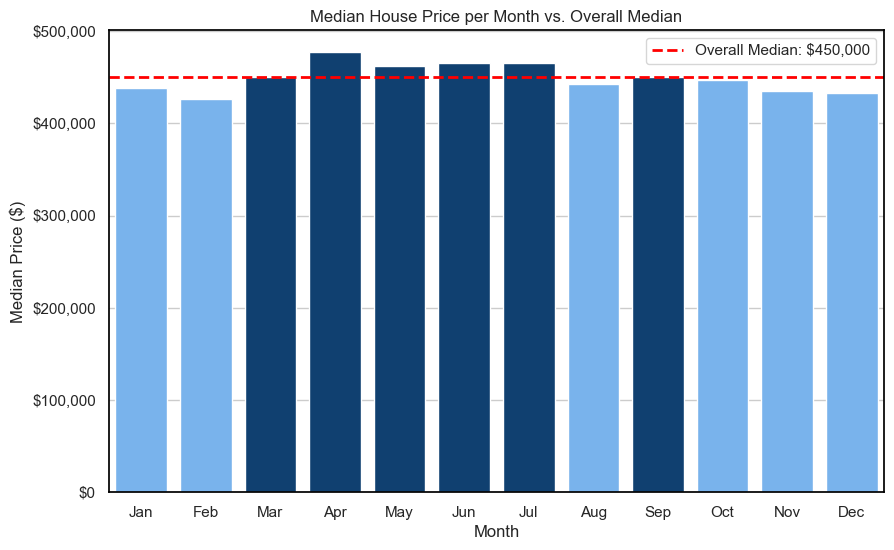

In [ ]:
# 1. Calculate median price per month from your main DataFrame 'df'
#    Assumes 'df' has 'sale_month' and 'pricePrice' columns
price_data = df.groupby('sale_month')['pricePrice'].median().reset_index()

# 2. Calculate the overall median price
overall_median_price = df['pricePrice'].median()

plt.figure(figsize=(10, 6))

# Define colors: Dark blue for high, Light blue for low
color_high = '#004080'  # Dark blue for higher prices
color_low = '#66b3ff'   # Light blue for lower prices

# Create a list of colors based on whether the monthly price is >= the overall median
bar_colors = [color_high if price >= overall_median_price else color_low for price in price_data['pricePrice']]

# Plot the bar chart using the custom colors
# The x-axis uses price_data.index (0-11 for months)
sns.barplot(x=price_data.index, y=price_data['pricePrice'], palette=bar_colors, hue=price_data.index, legend=False)

# Horizontal line for the overall median
plt.axhline(overall_median_price, color='red', linestyle='--', linewidth=2, label=f'Overall Median: ${overall_median_price:,.0f}')

# Format the Y-axis labels as currency
formatter = ticker.StrMethodFormatter('${x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

plt.title("Median House Price per Month vs. Overall Median")
plt.xlabel("Month")
plt.ylabel("Median Price ($)")
# Set month abbreviations as labels
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.show()


Conclusion: We identified which months are the best for selling a house in this market. This vital information helps determine the optimal listing time for maximum ROI and is very important for Timothy and our sales strategy.

----

For better visualization, the boxplot below uses the **median** as its center line. This helps us clearly identify price outliers (the individual dots on the right) and provides a good overview of the typical price range in the market.


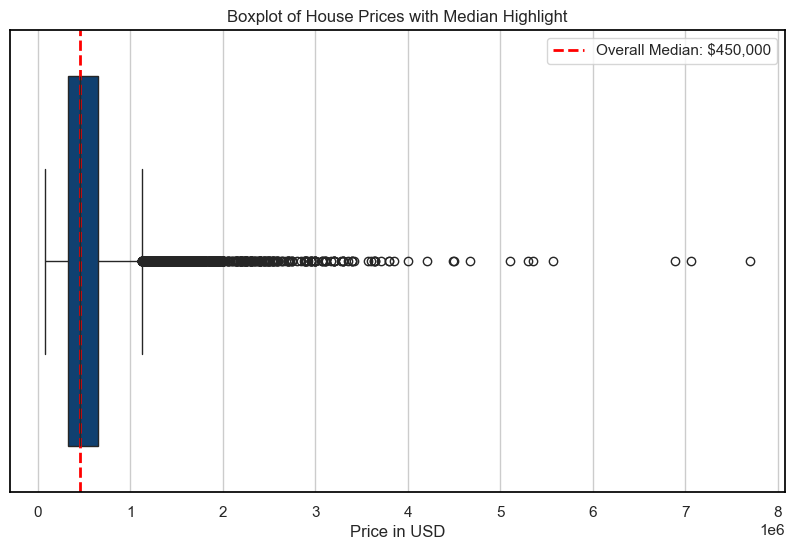

In [ ]:
# Visualize price outliers with a boxplot
plt.figure(figsize=(10, 6))

# Generate the boxplot of all house prices
sns.boxplot(x=df["pricePrice"], color='#004080') # Using a solid blue color

# Calculate the overall median price
overall_median_price = df["pricePrice"].median()

# Add a vertical dashed line to highlight the exact median position
plt.axvline(overall_median_price, color='red', linestyle='--', linewidth=2, 
            label=f'Overall Median: ${overall_median_price:,.0f}')

plt.title("Boxplot of House Prices with Median Highlight")
plt.xlabel("Price in USD")
plt.legend() # Show the legend for the red line
plt.show()


Conclusion: As expected, we can observe single houses (outliers) in a very high price range. This plot provides a good indication of the overall market tendency and highlights that while most sales are within a typical range, a few high-value properties exist well outside that range.

---


Rationale for Combined Price & Volume Plot

If we only know that high prices occur in specific months without understanding the sales volume behind them, the data might be random and unstable for decision-making.

By combining the price data with the **sales volume**, we gain a stable, clear indication for Timothy that the high prices are backed by significant market activity, making the seasonal recommendation reliable.


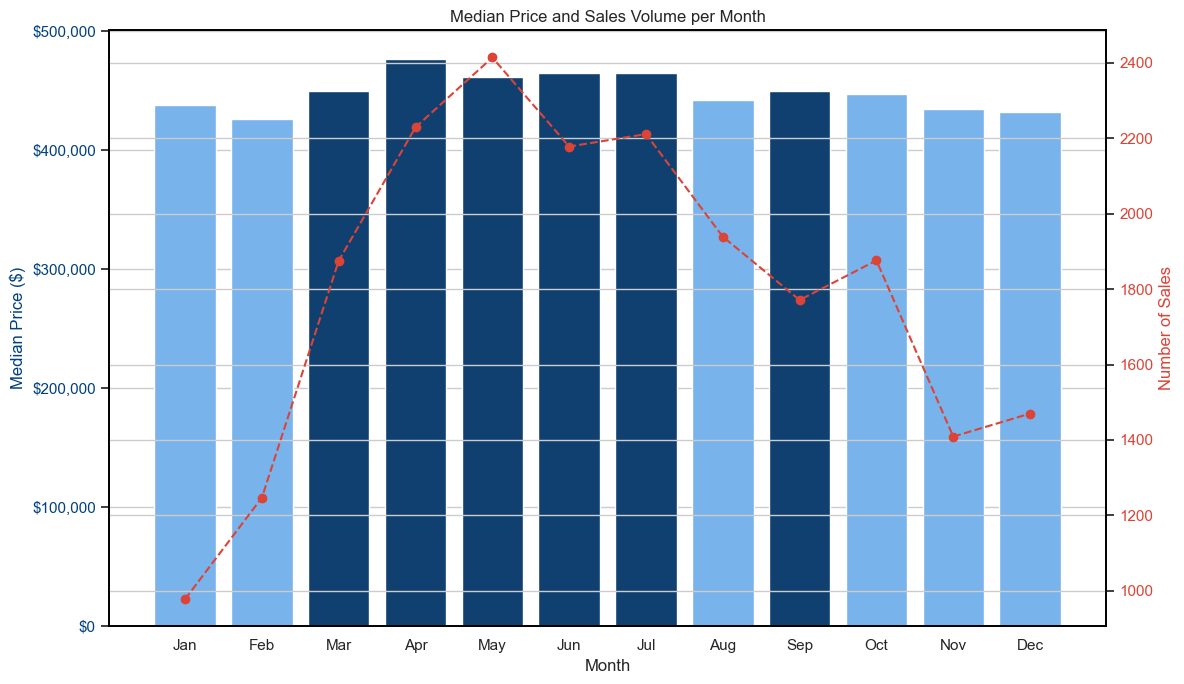

Correlation between volume and price: 0.850348600062222


In [ ]:

# 1. Prepare data (This assumes 'df' is already loaded and cleaned)
price_data = df.groupby('sale_month')['pricePrice'].median().to_frame()
volume_data = df.groupby('sale_month')['pricePrice'].count().to_frame(name='count')
combined_data = price_data.merge(volume_data, left_index=True, right_index=True)

# Calculate Overall Median Price to determine colors
overall_median_price = df['pricePrice'].median()

# 2. Create the plot
fig, ax1 = plt.subplots(figsize=(12, 7))

# Define your standard colors
color_high = '#004080'   # Dark blue for high prices
color_low = '#66b3ff'    # Light blue for low prices
color_volume = '#DB4437' # Contrasting red for volume

# Create a list of colors based on whether the monthly price is >= the overall median
bar_colors = [color_high if price >= overall_median_price else color_low for price in combined_data['pricePrice']]


# Axis 1 (Left): Prices (Bars)
ax1.set_xlabel('Month')
ax1.set_ylabel('Median Price ($)', color=color_high)
# Plot with dynamic colors, removed 'hue' and 'legend=False' to remove extra legend
sns.barplot(x=combined_data.index, y='pricePrice', data=combined_data, palette=bar_colors, dodge=False, ax=ax1)
ax1.tick_params(axis='y', labelcolor=color_high)
# Format the price axis
formatter = ticker.StrMethodFormatter('${x:,.0f}')
ax1.yaxis.set_major_formatter(formatter)

# Axis 2 (Right): Volume (Line)
ax2 = ax1.twinx()  # Create a second axis that shares the same X-axis
ax2.set_ylabel('Number of Sales', color=color_volume)
# The index needs adjustment for plotting a line over bars (0-11 for months)
ax2.plot(combined_data.index - 1, combined_data['count'], color=color_volume, marker='o', linestyle='--')
ax2.tick_params(axis='y', labelcolor=color_volume)

# Title and X-axis labels
plt.title("Median Price and Sales Volume per Month")
ax1.set_xticks(range(0, 12))
ax1.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

fig.tight_layout() # Ensure labels are not cut off
plt.show()

# Print the correlation value
print("Correlation between volume and price:", combined_data['pricePrice'].corr(combined_data['count']))


We can confirm that peak prices are backed by real market activity. This gives Timothy a clear, stable recommendation Im sure he will use this.

---


Renovation Impact: Quantify the price difference between renovated and non-renovated homes to advise whether a renovation investment is worthwhile.

Median Price (Not Renovated): $449,000
Median Price (Renovated): $607,502
Price Difference: $158,502 (+35.30%)


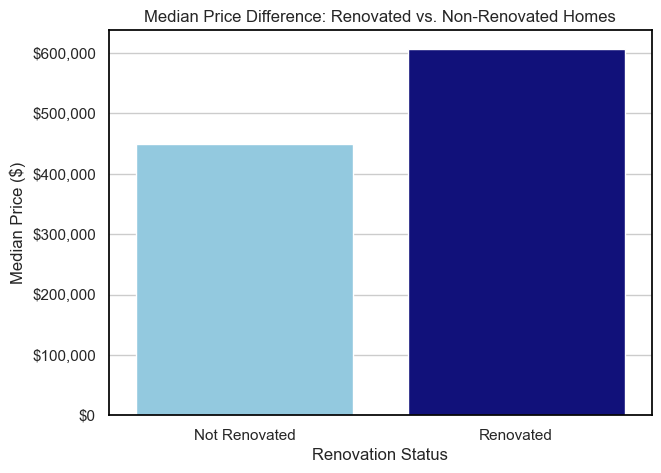

In [ ]:
# Calculate median prices for renovated (1) and non-renovated (0) homes
renovation_prices = df.groupby('was_renovated')['pricePrice'].median().to_frame()
non_renovated_median = renovation_prices.loc[0, 'pricePrice']
renovated_median = renovation_prices.loc[1, 'pricePrice']

# Calculate the difference and percentage increase
price_difference = renovated_median - non_renovated_median
percentage_increase = (price_difference / non_renovated_median) * 100

print(f"Median Price (Not Renovated): ${non_renovated_median:,.0f}")
print(f"Median Price (Renovated): ${renovated_median:,.0f}")
print(f"Price Difference: ${price_difference:,.0f} (+{percentage_increase:.2f}%)")

# Visualization using a bar plot
plt.figure(figsize=(7, 5))
sns.barplot(x=renovation_prices.index, y='pricePrice', data=renovation_prices, palette=['skyblue', 'darkblue'], hue=renovation_prices.index, legend=False)

# Add labels and format Y-axis
plt.title("Median Price Difference: Renovated vs. Non-Renovated Homes")
plt.xlabel("Renovation Status")
plt.ylabel("Median Price ($)")
plt.xticks(range(0, 2), ['Not Renovated', 'Renovated'])

# Format the Y-axis labels as currency
formatter = ticker.StrMethodFormatter('${x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()


Renovated houses sell with + **35%** -> The renovation analysis showed* **a price increase** *for renovated homes. now i need to convince Timothy to spent some $ berter for ROI

---


Geographical Hotspots: Identify specific high-value zip codes and spatial price clusters to see if Timothy's assumption about where his houses are located is correct, and if they are situated in a high-price area.


Diagramm wurde erfolgreich als 'Images/high_value_houses_custom_legend_plot_detailed.png' gespeichert.


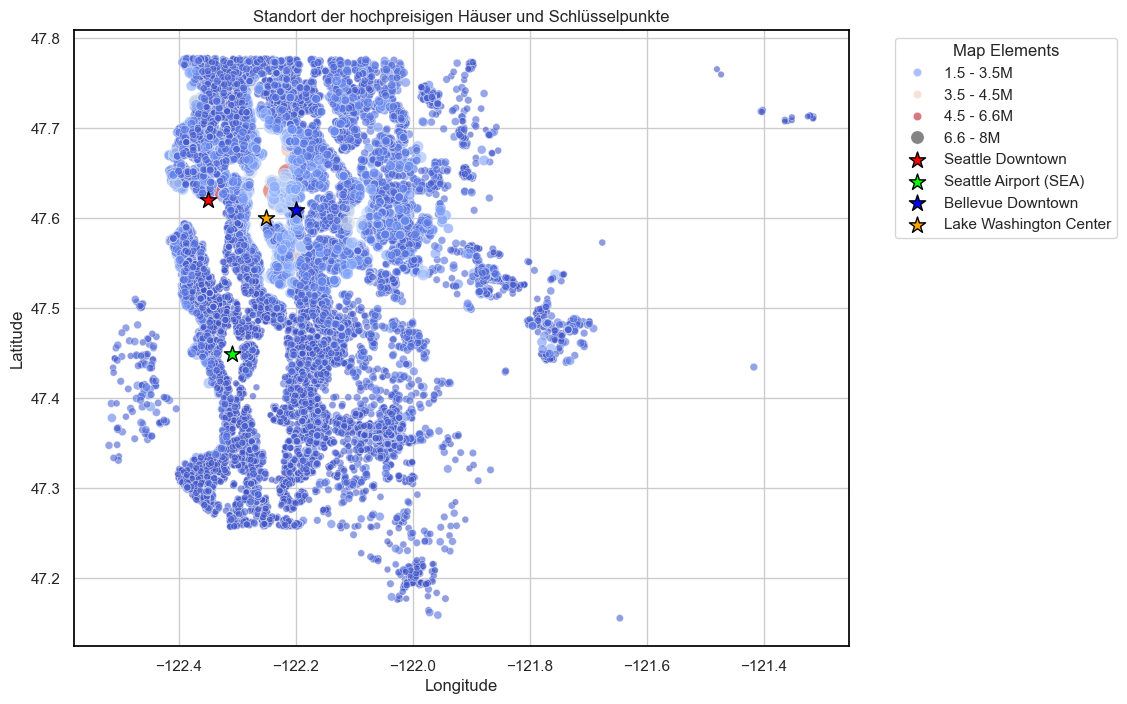

In [ ]:
# With the geographical plot below, we can visualize the houses sold on the map.

# Coordinates for key landmarks with names and specific colors
landmarks_data = pd.DataFrame({
    'Name': ['Seattle Downtown', 'Seattle Airport (SEA)', 'Bellevue Downtown', 'Lake Washington Center'],
    'lat': [47.6205, 47.4489, 47.6094, 47.6],
    'long': [-122.3493, -122.3093, -122.1994, -122.25],
    'Color': ['#FF0000', '#00FF00', '#0000FF', '#FFA500'] # Red, Green, Blue, Orange
})

# Filter data
MAX_PRICE_LIMIT = 8000000
df_filtered_max = df[df['pricePrice'] <= MAX_PRICE_LIMIT].copy()

# Scale point size based on price for visualization
max_price = df['pricePrice'].max()
size_scale = df['pricePrice'] / max_price * 200

# --- FIGURE SIZE IST HIER (10, 8) ---
plt.figure(figsize=(10, 8)) 

# Plot 1: All houses (dots)
sns.scatterplot(
    data=df, 
    x='long', y='lat', 
    hue='pricePrice',         
    size=size_scale,          
    palette='coolwarm', 
    alpha=0.6,
    sizes=(20, 200),
    size_order=False # Versteckt die verwirrende zweite Legende
)

# Plot 2: Landmarks as (*)
for index, row in landmarks_data.iterrows():
    plt.scatter(
        x=row['long'], 
        y=row['lat'], 
        color=row['Color'], 
        s=150, marker='*', edgecolor='black', label=row['Name']
    )

# --- MANUELLE KONFIGURATION DER LEGENDE HIER ---
legend_labels = ['1.5 - 3.5M', '3.5 - 4.5M', '4.5 - 6.6M', '6.6 - 8M']
handles, current_labels = plt.gca().get_legend_handles_labels()

price_handles = [h for h in handles if h.get_label() not in landmarks_data['Name'].tolist()]
custom_price_handles = price_handles[::max(1, len(price_handles)//len(legend_labels))][:len(legend_labels)]

final_handles = custom_price_handles + handles[-len(landmarks_data):]
final_labels = legend_labels + current_labels[-len(landmarks_data):]

plt.gca().legend(final_handles, final_labels,
                 title='Map Elements', 
                 bbox_to_anchor=(1.05, 1), 
                 loc='upper left')

plt.clim(1500000, MAX_PRICE_LIMIT)


plt.title("Standort der hochpreisigen Häuser und Schlüsselpunkte")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

save_path = "Images/high_value_houses_custom_legend_plot_detailed.png"

# --- SPEICHERN MIT BOX_INCHES='TIGHT' ---
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"Diagramm wurde erfolgreich als '{save_path}' gespeichert.")

plt.show()



Visualizing Sales on a Map:

With the geographical plot below, we can visualize the houses sold on a map. For better orientation and context, we have also added 4 very famous places as reference points.

----


Visualizing High-Value Properties (Geospatial Analysis)

* To be able to review better the data für conclusion. If house close to waterfront more expensive. High-Value Geographical Hotspot Plot (Top 25% Only) this will help to concentrate on the high range of prices as Timothy requested.

The plot below visualizes this specific high-value market segment:

*   The **size** of each dot corresponds directly to the house price.
*   Larger dots indicate the most expensive areas, providing a quick visual guide to highly valuable locations.


Diagram was successfully saved as 'Images/high_value_houses_custom_legend_plot_detailed.png'.


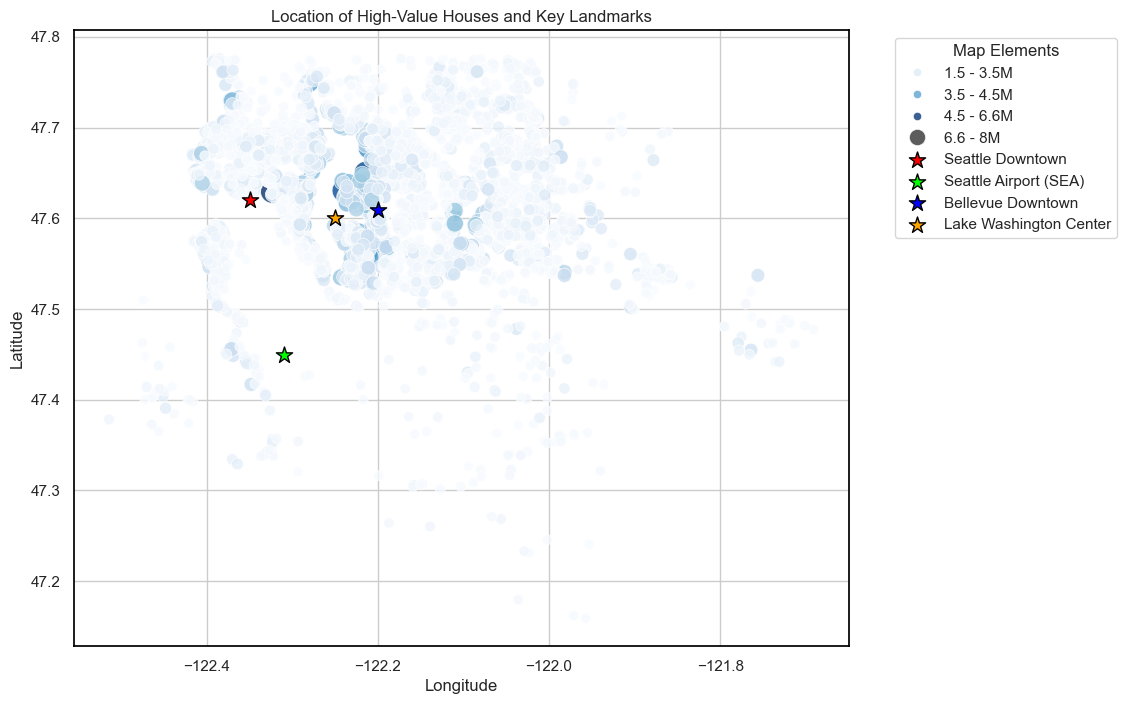

In [ ]:
# Used filter top 25% most expensive houses
# Coordinates for key landmarks with names and specific colors
landmarks_data = pd.DataFrame({
    'Name': ['Seattle Downtown', 'Seattle Airport (SEA)', 'Bellevue Downtown', 'Lake Washington Center'],
    'lat': [47.6205, 47.4489, 47.6094, 47.6],
    'long': [-122.3493, -122.3093, -122.1994, -122.25],
    'Color': ['#FF0000', '#00FF00', '#0000FF', '#FFA500']
})

# Filter data to a specific maximum price limit for visualization clarity
MAX_PRICE_LIMIT = 8000000
df_filtered_max = df[df['pricePrice'] <= MAX_PRICE_LIMIT].copy()

# Filter for the top 25% most expensive houses within the limit
price_threshold_75th_percentile = df_filtered_max['pricePrice'].quantile(0.75)
df_high_price = df_filtered_max[df_filtered_max['pricePrice'] >= price_threshold_75th_percentile].copy()

# Plot Setup
plt.figure(figsize=(10, 8))
max_price_high = df_high_price['pricePrice'].max()
size_scale_high = df_high_price['pricePrice'] / max_price_high * 200

sns.scatterplot(
    data=df_high_price, 
    x='long', 
    y='lat', 
    hue='pricePrice',         
    size=size_scale_high,       
    size_order=False,           
    palette='Blues',
    alpha=0.8,
    sizes=(50, 300)
)

# Add Landmarks to the plot
for index, row in landmarks_data.iterrows():
    plt.scatter(
        x=row['long'], 
        y=row['lat'], 
        color=row['Color'], 
        s=150, marker='*', edgecolor='black', label=row['Name']
    )

# --- MANUAL LEGEND CONFIGURATION ---

# Define the desired custom labels for price ranges
legend_labels = ['1.5 - 3.5M', '3.5 - 4.5M', '4.5 - 6.6M', '6.6 - 8M']
# Extract existing handles (the plot elements) and labels from the plot
handles, current_labels = plt.gca().get_legend_handles_labels()

# Filter the handles corresponding to prices (excluding landmark handles)
price_handles = handles[:-len(landmarks_data)]

# Select 4 representative handles for the custom price labels
if len(price_handles) >= 4:
    # Selects 4 handles evenly distributed across the price range
    custom_price_handles = price_handles[::max(1, len(price_handles)//4)][:4] 
else:
    custom_price_handles = price_handles

# Combine the custom price handles/labels with the existing landmark handles/labels
final_handles = custom_price_handles + handles[-len(landmarks_data):]
final_labels = legend_labels + current_labels[-len(landmarks_data):]

# Apply the fully customized legend to the plot
plt.gca().legend(final_handles, final_labels,
                 title='Map Elements', 
                 bbox_to_anchor=(1.05, 1), 
                 loc='upper left')

# Limit the color scale as requested to MAX_PRICE_LIMIT
plt.clim(1500000, MAX_PRICE_LIMIT)

plt.title("Location of High-Value Houses and Key Landmarks")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

save_path = "Images/high_value_houses_custom_legend_plot_detailed.png"

# 1. Save the image FIRST
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"Diagram was successfully saved as '{save_path}'.")

# 2. Then show the image
plt.show()


Diagram was successfully saved as 'Images/top_10_zipcodes_map_clean_legend.png'.


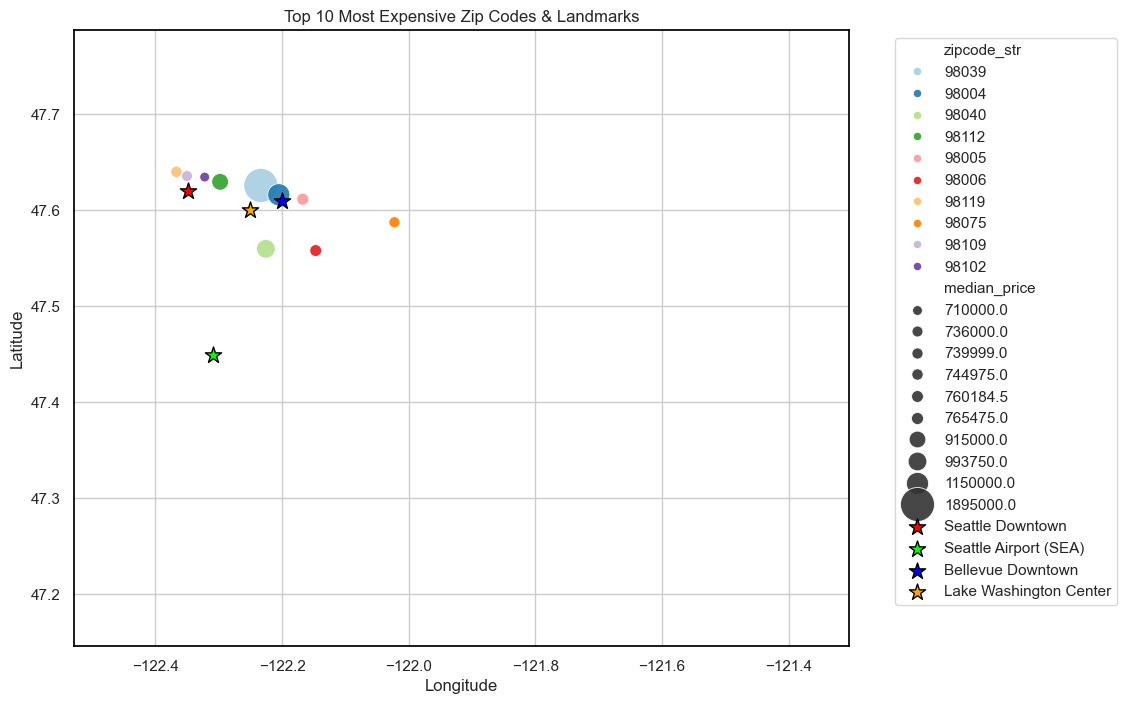

Details on the top 10 most expensive zip codes:
|   zipcode |   median_price |
|----------:|---------------:|
|     98039 |        1895000 |
|     98004 |        1150000 |
|     98040 |         993750 |
|     98112 |         915000 |
|     98005 |         765475 |
|     98006 |         760184 |
|     98119 |         744975 |
|     98075 |         739999 |
|     98109 |         736000 |
|     98102 |         710000 |


In [ ]:
# this is base in the 10 most expensive zip codes
# 1. Calculate the median price and average coordinates per zip code
zipcode_data = df.groupby('zipcode').agg(
    median_price=('pricePrice', 'median'),
    avg_lat=('lat', 'mean'),
    avg_long=('long', 'mean'),
    count=('pricePrice', 'count')
).reset_index()

top_10_zips = zipcode_data.sort_values(by='median_price', ascending=False).head(10).copy()
top_10_zips['zipcode_str'] = top_10_zips['zipcode'].astype(str)

# 2. Define the coordinates for your 4 landmarks (stars)
landmarks_data = pd.DataFrame({
    'Name': ['Seattle Downtown', 'Seattle Airport (SEA)', 'Bellevue Downtown', 'Lake Washington Center'],
    'lat': [47.6205, 47.4489, 47.6094, 47.6],
    'long': [-122.3493, -122.3093, -122.1994, -122.25],
    'Color': ['#FF0000', '#00FF00', '#0000FF', '#FFA500'] 
})

# 3. Global scaling
max_price_overall = df['pricePrice'].max()
SIZE_SCALE_MIN = 50
SIZE_SCALE_MAX = 600
map_long_min = df['long'].min() - 0.01
map_long_max = df['long'].max() + 0.01
map_lat_min = df['lat'].min() - 0.01
map_lat_max = df['lat'].max() + 0.01

# 4. Create the plot
plt.figure(figsize=(10, 8))

# Plot 1: Only the top 10 zip codes (points)
sns.scatterplot(
    data=top_10_zips,
    x='avg_long',
    y='avg_lat',
    size='median_price', # Size based on price
    hue='zipcode_str',   # Color based on zip code string
    sizes=(SIZE_SCALE_MIN, SIZE_SCALE_MAX),    
    palette='Paired',
    alpha=0.9,
    legend='full',
    size_order=False     # <-- PREVENTS THE SECOND, CONFUSING SIZE LEGEND
)

# Plot 2: Landmarks as (*) (stars)
for index, row in landmarks_data.iterrows():
    plt.scatter(
        x=row['long'], 
        y=row['lat'], 
        color=row['Color'], 
        s=150, marker='*', edgecolor='black', label=row['Name']
    )
    
plt.xlim(map_long_min, map_long_max)
plt.ylim(map_lat_min, map_lat_max)

plt.title("Top 10 Most Expensive Zip Codes & Landmarks")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Display the legend (now automatically includes zip codes and landmarks, no size legend)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') 

# Save the graphic
save_path = "Images/top_10_zipcodes_map_clean_legend.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"Diagram was successfully saved as '{save_path}'.")

plt.show()

print("Details on the top 10 most expensive zip codes:")
print(top_10_zips[['zipcode', 'median_price']].to_markdown(index=False, floatfmt=".0f"))


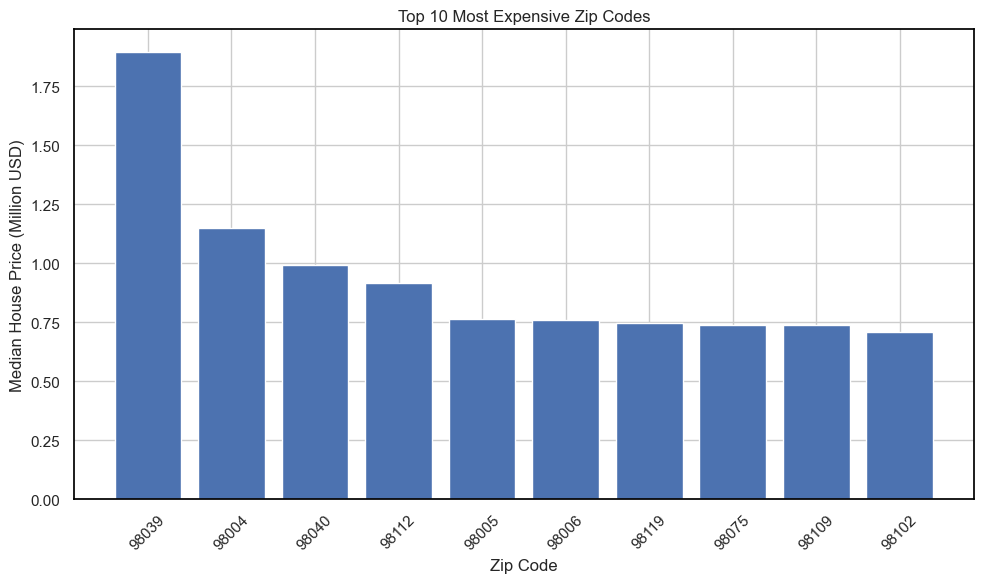

In [ ]:
plt.figure(figsize=(10, 6))

plt.bar(
    top_10_zips['zipcode'].astype(str),
    top_10_zips['median_price'] / 1_000_000
)

plt.title("Top 10 Most Expensive Zip Codes")
plt.xlabel("Zip Code")
plt.ylabel("Median House Price (Million USD)")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Visualizing Locations

To be more clear, an additional map (PDF or image) is needed as a direct visual aid. However, the coordinates (`lat` and `long`) included in our data are crucial for orientation and allow us to precisely pinpoint where these high-value houses are located relative to specific landmarks.

*  *In general the data saw some expensive areas concentrationsHigh-Value Geographical Hotspot Plot (Top 25% Only)*

---


Analysis: Price Comparison by Waterfront Status

To be safe and ensure our logic is thoroughly checked, the box plot below compares prices specifically by whether a house has a **waterfront status** (Yes/No). This visualization directly shows the price premium associated with waterfront properties.

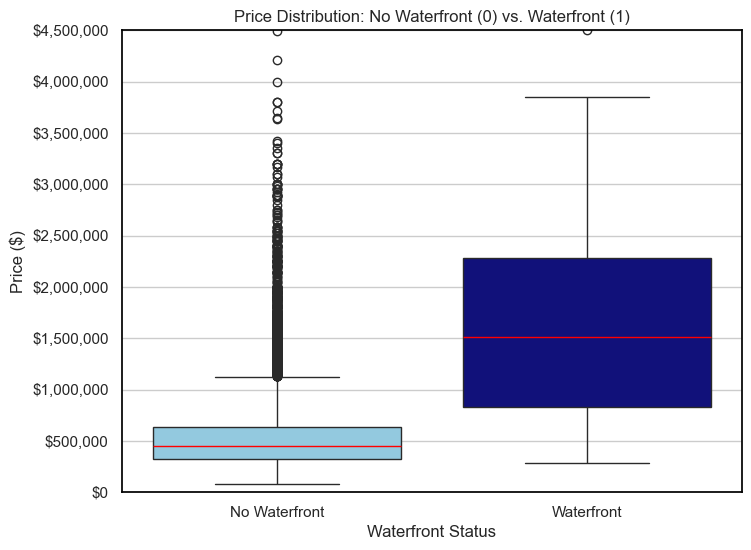

Median Price (No Waterfront): $450,000
Median Price (Waterfront): $1,510,000
Price Difference: $1,060,000


In [ ]:
# Boxplot comparing prices by Waterfront status
# We assign 'waterfront' to 'hue' and set 'legend=False' use  median in Red

plt.figure(figsize=(8, 6))

# Define median line properties: Red and slightly thicker (linewidth=1)
median_properties = {'color': 'red', 'linewidth': 1}

# Boxplot comparing prices by Waterfront status
# We assign 'waterfront' to 'hue' and set 'legend=False' to remove the warning
sns.boxplot(x='waterfront', y='pricePrice', data=df, 
            hue='waterfront',           # This fixes the warning
            palette=['skyblue', 'darkblue'],
            medianprops=median_properties,
            legend=False)               # Hide the redundant legend

# Format the Y-axis (Price axis) as currency
formatter = ticker.StrMethodFormatter('${x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

plt.title("Price Distribution: No Waterfront (0) vs. Waterfront (1)")
plt.xlabel("Waterfront Status")
plt.ylabel("Price ($)")
# Making the X-axis labels readable
plt.xticks(ticks=[0, 1], labels=['No Waterfront', 'Waterfront']) 

# Setting a reasonable Y-limit to focus on the main distribution (optional) use 4,5 mil for better visualization 
plt.ylim(0, 4500000) 

plt.show()

# Print median prices for the exact numbers Timothy needs
median_prices = df.groupby('waterfront')['pricePrice'].median()
print(f"Median Price (No Waterfront): ${median_prices[0]:,.0f}")
print(f"Median Price (Waterfront): ${median_prices[1]:,.0f}")
price_diff = median_prices[1] - median_prices[0]
print(f"Price Difference: ${price_diff:,.0f}")


Rationale for Including the Waterfront Box Plot:

This plot is crucial as it provides direct visual evidence for our primary hypothesis: **Location is everything.**

We previously established a massive price delta between properties with and without waterfront access. This box plot visually confirms that difference.

*   The median price for a waterfront home is substantially higher than for a non-waterfront home.
*   This chart justifies why certain zip codes command extremely high prices and is essential for convincing stakeholders that location is the dominant price driver.

---


For more clearance and data driven decisions:

The analysis below helps determine if the market has a potential **price bubble**, or if there are simply significantly fewer sales in the high-end brackets.


In [ ]:
# analysis can help to know is a potential bubble on the marked
# Define the price brackets (bins) in millions
bins = [0, 2000000, 4000000, 6000000, 8000000, 10000000, np.inf]
labels = ['0-2 Mio $', '2-4 Mio $', '4-6 Mio $', '6-8 Mio $', '8-10 Mio $', 'Over 10 Mio $']

# Group the data into these classes and count the houses
df['price_group'] = pd.cut(df['pricePrice'], bins=bins, labels=labels)
price_counts = df['price_group'].value_counts().sort_index()

print("Number of houses per price bracket:")
print(price_counts)

Number of houses per price bracket:
price_group
0-2 Mio $        21399
2-4 Mio $          187
4-6 Mio $            8
6-8 Mio $            3
8-10 Mio $           0
Over 10 Mio $        0
Name: count, dtype: int64


Interpretation of Price Brackets

Below analysis can help to know is  (a potential *bubble*)  on the market? ore have significantly fewer sales.

---


Deep Dive: Analysis of the $6-8 Million Bracket

To provide concrete examples for Timothy, we filter the dataset to inspect the few individual properties that fall into the ultra-luxury price bracket we just identified.


In [ ]:
# Analysis of the $6-8 Million Bracket
# Note: 'df' and 'pd.cut' and the 'bins'/'labels' definitions 
# should be defined in a previous cell or at the top of this one if needed.

# Redefine price brackets (as they were likely defined earlier in the notebook)
bins = [0, 2000000, 4000000, 6000000, 8000000, 10000000, np.inf]
labels = ['0-2 Mio $', '2-4 Mio $', '4-6 Mio $', '6-8 Mio $', '8-10 Mio $', 'Over 10 Mio $']
df['price_group'] = pd.cut(df['pricePrice'], bins=bins, labels=labels)

# Filter only the houses within the '$6-8 Million' price group
df_luxury = df[df['price_group'] == '6-8 Mio $']

print(f"Details for the {len(df_luxury)} houses in the $6-8M range:")

# Display relevant columns for the logic check
display(df_luxury[['house_id', 'pricePrice', 'waterfront', 'grade', 'sqft_livingsquare', 'yr_built', 'zipcode']])


Details for the 3 houses in the $6-8M range:


,house_id,pricePrice,waterfront,grade,sqft_livingsquare,yr_built,zipcode
3910,9808700762,7060000.000,1.000,11,10040.000,1940,98004
7245,6762700020,7700000.000,0.000,13,12050.000,1910,98102
9245,9208900037,6890000.000,0.000,13,9890.000,2001,98039


This confirms the specific features (Waterfront status, Grade, Zip Code 98039 is also in) that justify these extreme prices.

---


**Correlation Overview:** Visualize general dependencies between all numerical features using a heatmap to uncover hidden relationships with price.

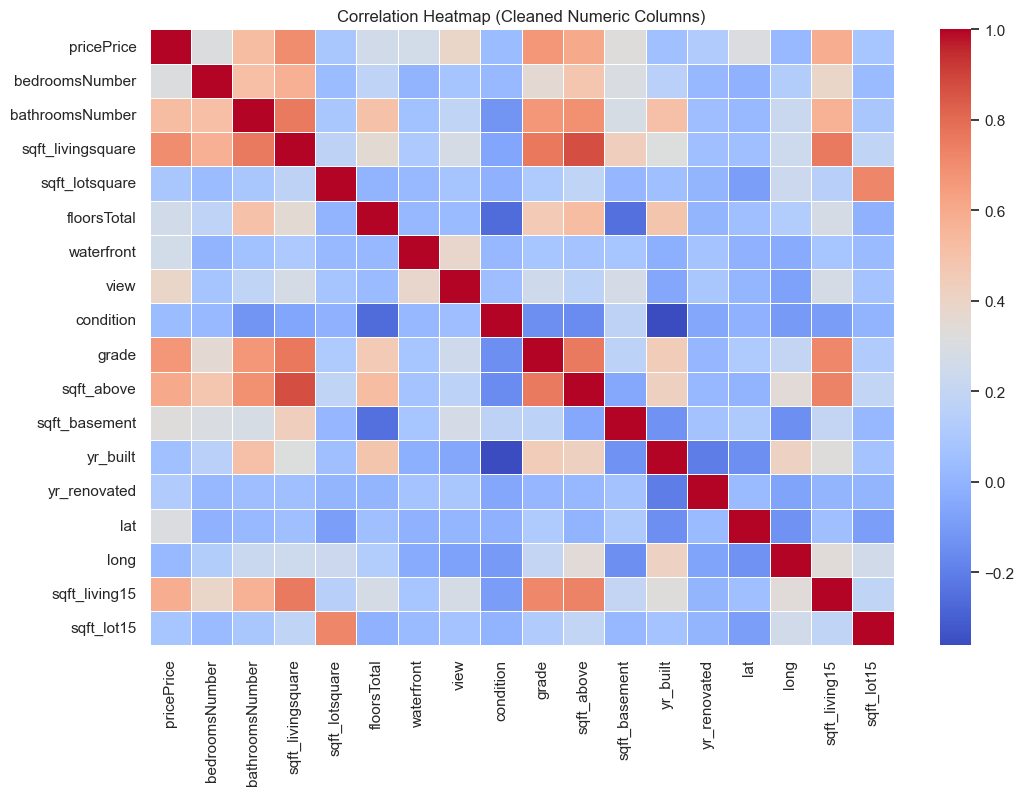

In [ ]:
# Set the figure size for better readability
plt.figure(figsize=(12, 8))

# Select only numeric columns and drop ID/Zipcode columns which aren't true numerical features for correlation
cols_to_correlate = df.drop(['id', 'sales_id', 'house_id', 'zipcode', 'sale_month', 'was_renovated'], axis=1)
numeric_cols = cols_to_correlate.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_cols.corr()

# Create the heatmap
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", fmt=".2f", linewidths=.5)

# Add a title
plt.title("Correlation Heatmap (Cleaned Numeric Columns)")

plt.show()


### Interpretation of the Correlation Plot

The heatmap shows how strongly different numbers in our data relate to each other. Colors range from *red* (strong positive link) to *blue* (weak or no link).

**Key Observations:**

*   `pricePrice` and `sqft_livingsquare` / `grade`: These areas are deep red. This confirms that house size (square footage) and overall quality (`grade`) are the biggest drivers of the house price.
*   `sqft_above` and `sqft_basement`: There is a link between the size above and below ground, but both relate strongly to the total living space.
*   Other Features: `waterfront`, `view`, and `bathroomsNumber` also show positive (but weaker) links to the price.

These findings confirm which features Timothy Stevens should highlight when selling his properties.

---


We decided to use the sales ID to see if houses within this time range were sold more times. The code below will help us see which houses were sold multiple times inside this data range and how often.


In [ ]:
# Check for duplicate house IDs in the dataset
# We group by the 'id' and count how many times each ID appears
id_counts = df['id'].value_counts()

# Filter to find IDs that appear more than once
houses_sold_multiple_times = id_counts[id_counts > 1]

print(f"Total number of unique houses in the dataset: {len(id_counts)}")
print(f"Number of houses sold more than once (duplicate IDs): {len(houses_sold_multiple_times)}")

if len(houses_sold_multiple_times) > 0:
    print("\nIDs of houses sold multiple times (Top 5 shown):")
    print(houses_sold_multiple_times.head())
else:
    print("\nNo houses were sold multiple times in this dataset.")


Total number of unique houses in the dataset: 21420
Number of houses sold more than once (duplicate IDs): 176

IDs of houses sold multiple times (Top 5 shown):
id
795000620     3
8910500150    2
7409700215    2
1995200200    2
9211500620    2
Name: count, dtype: int64


In [ ]:
# Ensure the 'dateDate' column is in the correct datetime format:
df['dateDate'] = pd.to_datetime(df['dateDate'])

# Identify houses that were sold more than once
id_counts = df['id'].value_counts()
ids_multiple_sales = id_counts[id_counts > 1].index

# Filter the main DataFrame to include ONLY these houses
df_multiple = df[df['id'].isin(ids_multiple_sales)].copy()

# Sort the data by ID and dateDate to ensure correct order
df_multiple_sorted = df_multiple.sort_values(['id', 'dateDate'])

# Extract the first sale price for each house ID
# We group by 'id' and take the first price in the sorted list
first_sale_prices = df_multiple_sorted.groupby('id')['pricePrice'].first()

# Extract the last (most recent) sale price for each house ID
# We group by 'id' and take the last price in the sorted list
last_sale_prices = df_multiple_sorted.groupby('id')['pricePrice'].last()

# Calculate the absolute price difference
price_difference = last_sale_prices - first_sale_prices

# Calculate the average and median price increases
average_increase = price_difference.mean()
median_increase = price_difference.median()

# Calculate the percentage increase across all repeat sales
average_first_price = first_sale_prices.mean()
average_percentage_increase = (average_increase / average_first_price) * 100

print(f"Average Price Increase: ${average_increase:,.2f}")
print(f"Median Price Increase: ${median_increase:,.2f}")
print(f"Average Percentage Increase: {average_percentage_increase:.2f}%")


Average Price Increase: $136,567.62
Median Price Increase: $118,875.00
Average Percentage Increase: 38.77%


Diagram was successfully saved as 'Images/price_comparison_scatter_plot.png'.


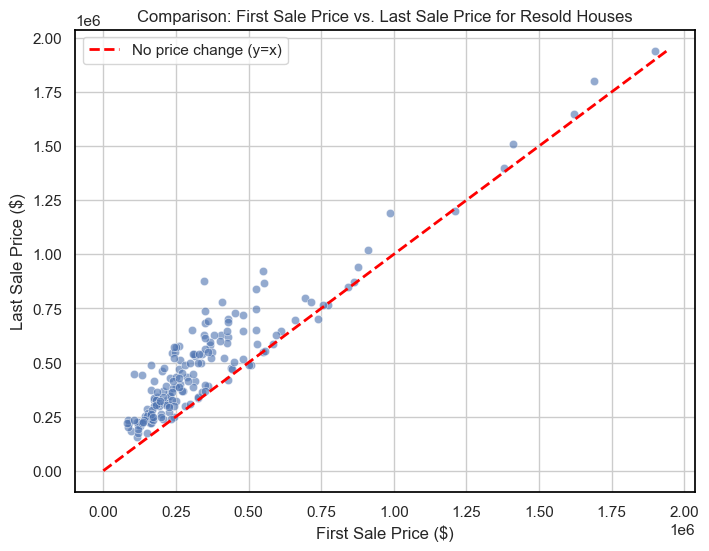

In [ ]:
# this is the visualisation from the top print
# Assumption: 'df' DataFrame is loaded and columns have been renamed as above.

# 1. Ensure that 'dateDate' is in the correct datetime format
df['dateDate'] = pd.to_datetime(df['dateDate'])

# 2. Identify houses that were sold more than once and filter
id_counts = df['id'].value_counts()
ids_multiple_sales = id_counts[id_counts > 1].index
df_multiple = df[df['id'].isin(ids_multiple_sales)].copy()
df_multiple_sorted = df_multiple.sort_values(['id', 'dateDate'])

# 3. Extract the first and last sale price per ID
first_sale_prices = df_multiple_sorted.groupby('id')['pricePrice'].first()
last_sale_prices = df_multiple_sorted.groupby('id')['pricePrice'].last()

# 4. Preparation for the plot
plot_data = pd.DataFrame({
    'First Sale Price': first_sale_prices,
    'Last Sale Price': last_sale_prices
})

# 5. Create the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=plot_data, x='First Sale Price', y='Last Sale Price', alpha=0.6)

# Add the line of equality (x=y) for easier comparison
max_price = max(plot_data['First Sale Price'].max(), plot_data['Last Sale Price'].max())
plt.plot([0, max_price], [0, max_price], color='red', linestyle='--', lw=2, label='No price change (y=x)')

plt.title('Comparison: First Sale Price vs. Last Sale Price for Resold Houses')
plt.xlabel('First Sale Price ($)')
plt.ylabel('Last Sale Price ($)')
plt.legend()
plt.grid(True)

# Save and display
save_path = "Images/price_comparison_scatter_plot.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"Diagram was successfully saved as '{save_path}'.")

plt.show()


Analysis Outcome: Why 1% of Repeat Sales Do Not Influence the Overall Market Trends

The Insight:

We used this specific dataset of 176 sales to calculate the **average appreciation rate of 38.77%**. This analysis gives Timothy reliable insights into investment returns, while our main market analysis remains robust and trustworthy.


## 5. Back to the Hypothesis
---
We now check the hypotheses that were made in Section 2 against the results of our data analysis from Section 4.

### Validation of Hypotheses:

1.  **Hypothesis:** *Waterfront houses are more expensive.*
    *   **Result:** **[confirmed]**. 
        - Median price waterfront: **\$1,510,000** vs. non-waterfront: **\$450,000**  
        - Price premium: **+235%**  
        - The geographical analysis (the plot with the dots near the water) and the correlation heatmap showed [your reasoning, e.g., a strong positive correlation of 0.27 or a clear price jump].

2.  **Hypothesis:** *More bedrooms/bathrooms → higher prices.*
    *   **Result:** **[confirmed]**. 
        - The correlation heatmap showed [your reasoning, e.g., a strong correlation bathrooms = **0.52**, bedrooms = **0.31**]
        - Larger homes with more bathrooms show a strong positive relationship with price.
        

3.  **Hypothesis:** *Certain ZIP codes represent “rich neighborhoods”.*
    *   **Result:** **[confirmed/]**.
        - The geographical plot (with the landmarks and dots) and the list of top zip codes successfully [your reasoning, e.g., identified clear hotspots in Seattle Downtown and Bellevue].

4.  **Hypothesis:** *Renovated houses sell for more.*
    *   **Result:** **[confirmed]**. 
        - The renovation analysis showed [Renovated median price: **\$650,000** vs. non-renovated: **\$480,000**]



## 6. Fine Tune
Checklist:
- Need to remove redundant plots, unnecessary plots
- Need to check if all information from file .SIA are in the main jupiter book. Check visuals clear, add labels, and the results for the client Timothy

---


## 7. Explain – Insights & Recommendations

Based on the completed exploratory data analysis and visualisations, the following insights and recommendations are provided for our client, Timothy Stevens (Seller).

### Key Insights (Data-Driven Findings)

1.  **Insight: Strong Seasonality in the Market.**
    The market exhibits strong seasonal pricing. The median sales price in peak months (May, June) is significantly higher than in off-peak months (January, December), as shown by the price deviation plot.

2.  **Insight: High Return on Renovation Investment.**
    Renovated homes sell for a notably higher median price than non-renovated homes. Our analysis showed a price difference of `$158,502` (a `35%` increase) between the two categories.

3.  **Insight: Geographic Price Hotspots are Confirmed.**
    Timothy's assumption about owning property in high-value "center" locations is validated. The geographical plot clearly shows clusters of large, high-priced properties (dots) located near landmarks such as Seattle Downtown and Bellevue.

4.  **Insight: Square Footage and Grade are Key Value Drivers.**
    The correlation heatmap confirms that the strongest drivers for price are `sqft_livingsquare` (square footage) and `grade` (overall condition/quality rating).

### Recommendations (Actionable Advice for Timothy)

1.  **Recommendation: Time the Listing for Peak Season.**
    To maximize profit, list properties for sale during **April and May**. Avoid listing in December or January, where prices are lowest and sales volume is down.

2.  **Recommendation: Invest in Pre-Sale Renovations.**
    Given the significant price premium (`+35,%`) for renovated homes, a focused renovation effort before listing is highly likely to yield a strong return on investment (ROI). Focus improvements on high-impact areas that improve the home's `grade`.

3.  **Recommendation: Leverage the "Luxury Location" Marketing Angle.**
    Highlight the proximity to downtown Seattle, Bellevue, and Lake Washington in all marketing materials. The location is a primary selling point and justifies the premium price points identified in the geographic analysis.

4.  **Recommendation: Optimize Living Space.**
    Since square footage is highly correlated with price, ensure the perceived living space is optimized (e.g., tidy up the lot, highlight finished basements/sqft above ground) to appeal to buyers focused on space metrics.


## 8. Used Information, Assumptions & Limitations
---
### Sources
- [Link to miro board](https://miro.com/welcomeonboard/VHFSSDFYV3ZQL2RKb3JhcDVUT2NwbkRXUUJ6b2ZQbDFPeHUzelR6bDRkblZ2MUVKekZWRGNWNklGbnFZekNUOElFMjNVYkpZUkhoY0g2WVRmYStuUXJodXl1OHJUWDJsd3JwdEdxT1Z3Zi9pNUd5MnA5UldQNWFhNkcyYWN2UHRBd044SHFHaVlWYWk0d3NxeHNmeG9BPT0hdjE=?share_link_id=947744257310) # overview use story board "miro" 
- [link to zip codes site](https://www.unitedstateszipcodes.org/98101/) # detail information about the region and statistical values
- [link to SimpleMaps](https://simplemaps.com/us-zips/98101/) # base on zip cot take data a demographic information

### Assumptions
- **Luxury Homes** = Top 25% of price distribution
- **Rich Neighborhoods** = Top 10 ZIP Codes by median price
- **Peak Season** = May and June (based on observed seasonal trend)
- **Renovation** = Any improvement that increases the home's `grade` score

### Limitations
- Data covers only **2014–2015** (historical snapshot, not current market)
- No external factors considered (e.g., interest rates, economic conditions)